In [24]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [25]:
from simpsons_paradox.simpsons_paradox import SimpsonsParadox

In [26]:
data_path = Path(os.getcwd()).parent / "data" / "dataset_diabetes"
df = pd.read_csv(data_path / "diabetic_preprocessed.csv")

#### Analysis by gender, race, age

<Axes: xlabel='readmit_30_days', ylabel='had_outpatient_days'>

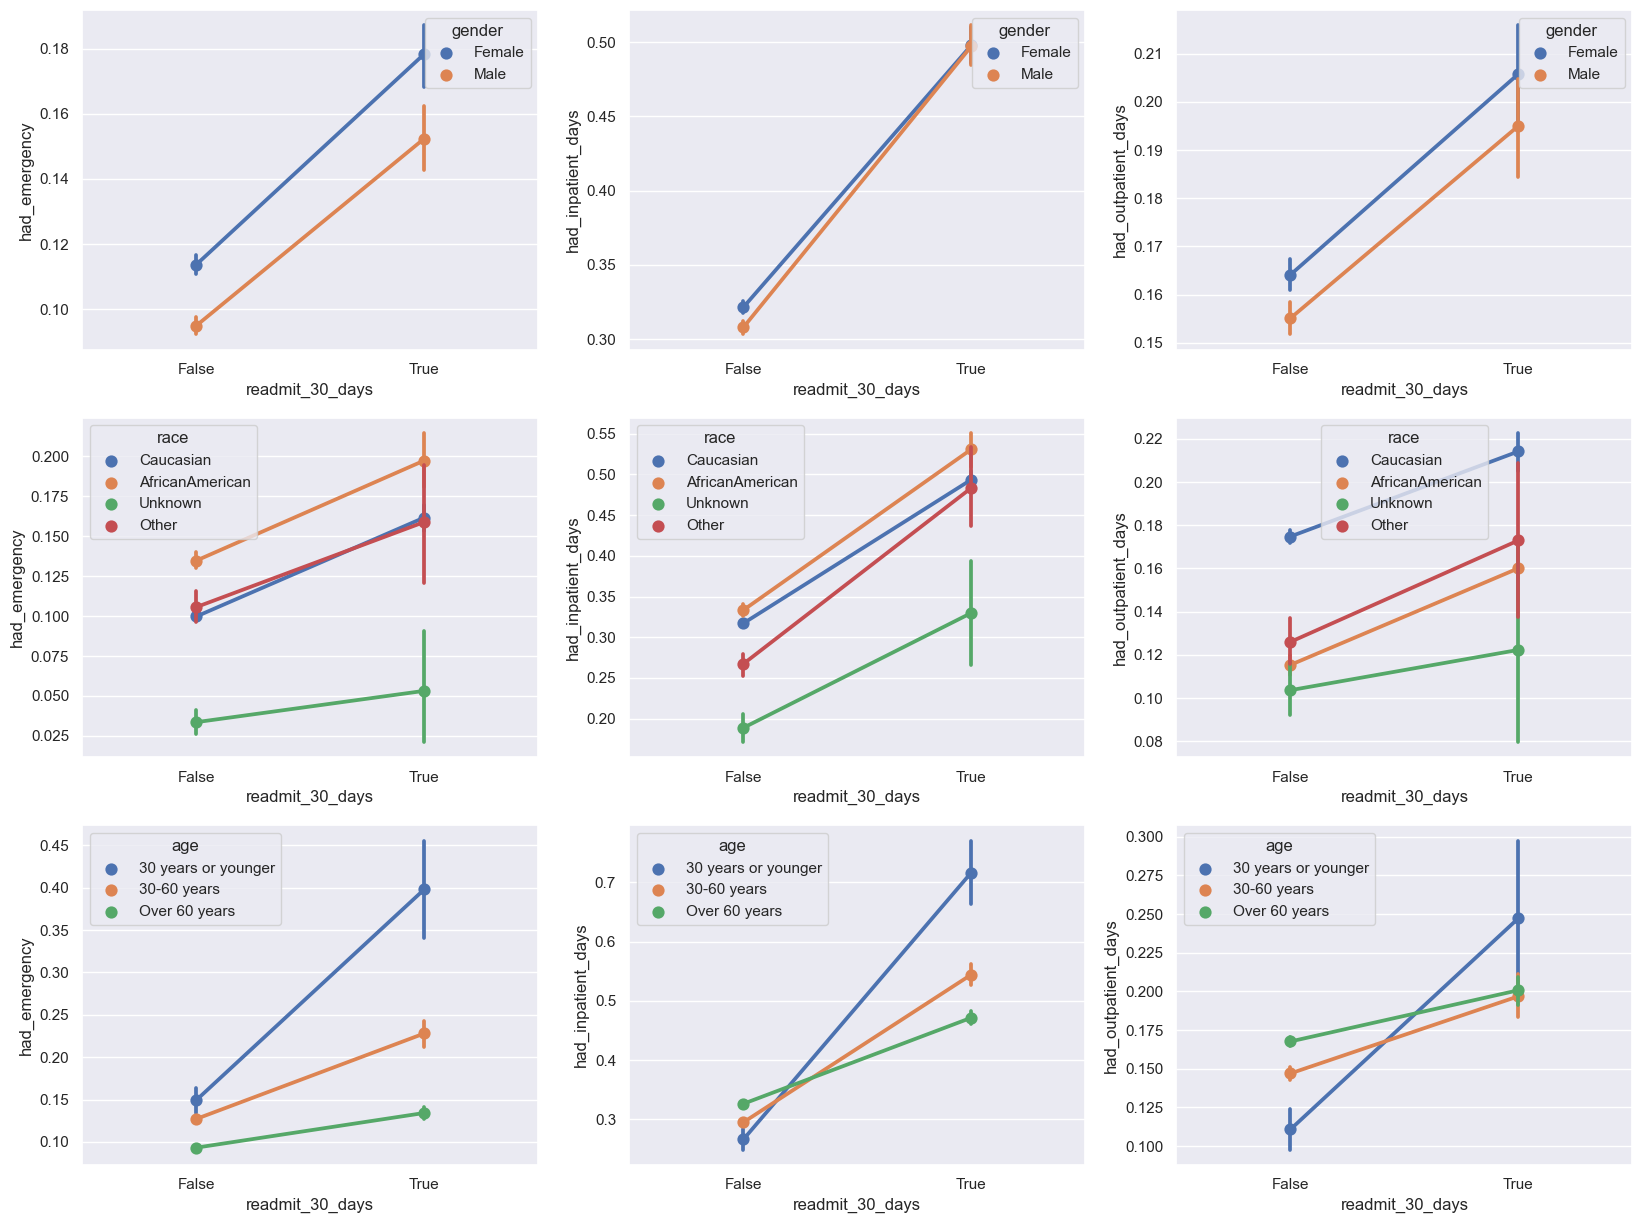

In [28]:
sns.set()
_, axes = plt.subplots(3, 3, figsize=(20, 15))

#gender
sns.pointplot(ax=axes[0, 0], data=df, x="readmit_30_days", y="had_emergency", hue='gender')
sns.pointplot(ax=axes[0, 1], data=df, x="readmit_30_days", y="had_inpatient_days", hue='gender')
sns.pointplot(ax=axes[0, 2], data=df, x="readmit_30_days", y="had_outpatient_days", hue='gender')

#race
sns.pointplot(ax=axes[1, 0], data=df, x="readmit_30_days", y="had_emergency", hue='race')
sns.pointplot(ax=axes[1, 1], data=df, x="readmit_30_days", y="had_inpatient_days", hue='race')
sns.pointplot(ax=axes[1, 2], data=df, x="readmit_30_days", y="had_outpatient_days", hue='race')

#age
sns.pointplot(ax=axes[2, 0], data=df, x="readmit_30_days", y="had_emergency", hue='age')
sns.pointplot(ax=axes[2, 1], data=df, x="readmit_30_days", y="had_inpatient_days", hue='age')
sns.pointplot(ax=axes[2, 2], data=df, x="readmit_30_days", y="had_outpatient_days", hue='age')

<Axes: xlabel='readmit_30_days', ylabel='time_in_hospital'>

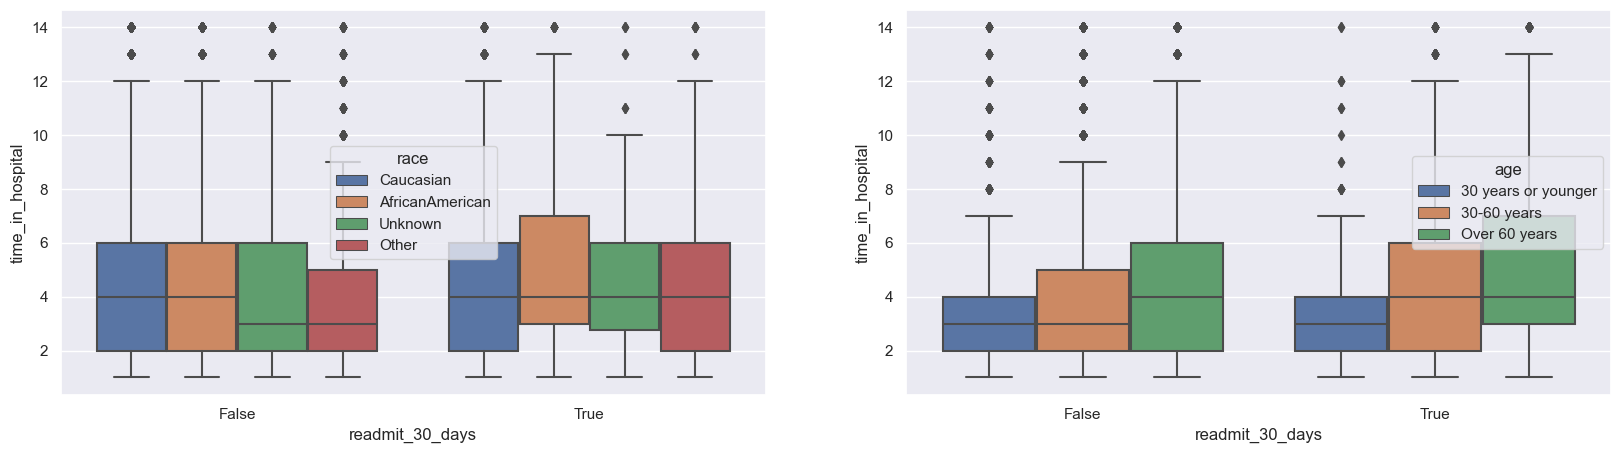

In [29]:
_, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(ax=axes[0], data=df, x="readmit_30_days", y="time_in_hospital", hue="race")
sns.boxplot(ax=axes[1], data=df, x="readmit_30_days", y="time_in_hospital", hue="age")

### Automatic detection of Simpson's paradox

In [ ]:
sp_5 = SimpsonsParadox(df=df, dv='time_in_hospital', ignore_columns=['encounter_id', 'patient_nbr', 'readmit_binary'], target_category=1)
sp_5.get_simpsons_pairs()

# 19 Simpson’s Pair(s) were detected in your dataset.
# [('admission_type_id', 'admission_source_id'),
#  ('admission_type_id', 'num_lab_procedures'),
#  ('admission_source_id', 'admission_type_id'),
#  ('admission_source_id', 'num_lab_procedures'),
#  ('num_procedures', 'num_medications'),
#  ('number_outpatient', 'discharge_disposition_id'),
#  ('number_outpatient', 'num_medications'),
#  ('number_outpatient', 'number_diagnoses'),
#  ('diag_1', 'num_lab_procedures'),
#  ('A1Cresult', 'num_lab_procedures'),
#  ('metformin', 'change'),
#  ('metformin', 'diabetesMed'),
#  ('glimepiride', 'num_medications'),
#  ('rosiglitazone', 'num_medications'),
#  ('had_emergency', 'number_inpatient'),
#  ('had_emergency', 'number_diagnoses'),
#  ('had_emergency', 'insulin'),
#  ('had_emergency', 'had_inpatient_days'),
#  ('race_all', 'race')]

Age <-> Diabetes Type

In [30]:
df["age_numeric"] = df.apply(lambda row: int(row["age_all"].split('-')[0][1:]), axis=1)

In [31]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,readmitted,readmit_30_days,readmit_binary,diabetes_type,had_emergency,had_inpatient_days,had_outpatient_days,race_all,age_all,age_numeric
0,2278392,8222157,Caucasian,Female,30 years or younger,Unknown,Other,Other,Referral,1,...,NO,False,False,Type 1,False,False,False,Caucasian,[0-10),0
1,149190,55629189,Caucasian,Female,30 years or younger,Unknown,Emergency,Discharged to Home,Emergency,3,...,>30,False,True,Type 1,False,False,False,Caucasian,[10-20),10
2,64410,86047875,AfricanAmerican,Female,30 years or younger,Unknown,Emergency,Discharged to Home,Emergency,2,...,NO,False,False,NaN,False,True,True,AfricanAmerican,[20-30),20
3,500364,82442376,Caucasian,Male,30-60 years,Unknown,Emergency,Discharged to Home,Emergency,2,...,NO,False,False,Type 1,False,False,False,Caucasian,[30-40),30
4,16680,42519267,Caucasian,Male,30-60 years,Unknown,Emergency,Discharged to Home,Emergency,1,...,NO,False,False,NaN,False,False,False,Caucasian,[40-50),40


<Axes: xlabel='diabetes_type', ylabel='age_numeric'>

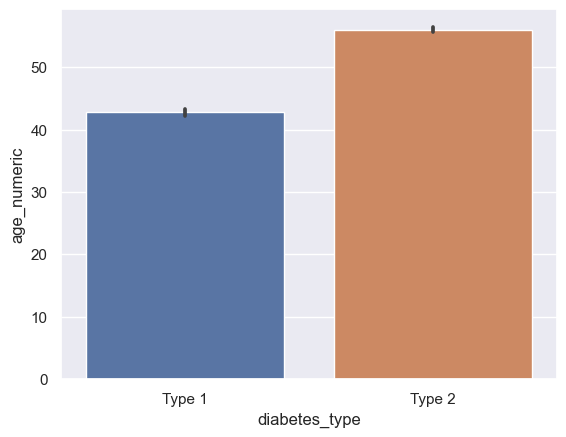

In [32]:
sns.barplot(data=df, x="diabetes_type", y="age_numeric")

<Axes: xlabel='age_all', ylabel='count'>

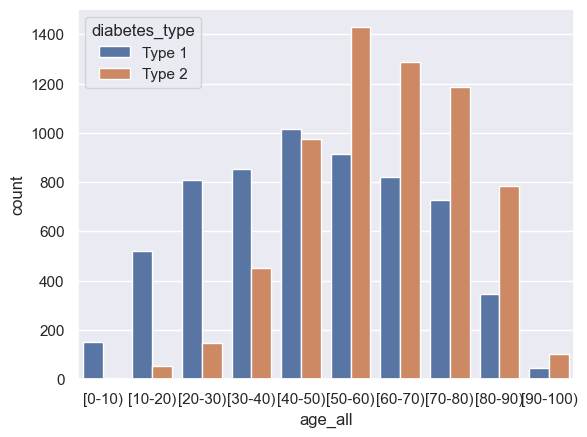

In [37]:
sns.countplot(data=df, x="age_all", hue="diabetes_type")